### Problema: Diseñar un modelo que prediga que clientes abandonaran la compañía (Churn = 1)


Telco customer churn problem
Source: Kaggle: https://www.kaggle.com/datasets/blastchar/telco-customer-churn/code

In [97]:
# Included libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix


In [98]:
# Raw file
churn_df = pd.read_csv('../Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [99]:
def fast_view(df1,col):
        colum_to_view = df1.groupby(col)['customerID'].count().reset_index()
        print('Column: ',colum_to_view)
        plt.pie(colum_to_view['customerID'],labels=colum_to_view[col] ,autopct='%1.1f%%')
        plt.title(col, loc='center', fontsize=30)
        plt.show()
        return len(colum_to_view['customerID'])

gender
Column:     gender  customerID
0  Female        3488
1    Male        3555


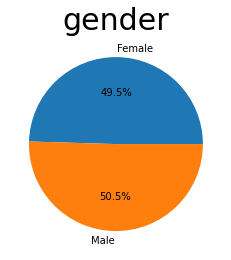

SeniorCitizen
Column:     SeniorCitizen  customerID
0              0        5901
1              1        1142


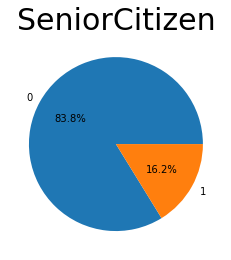

Partner
Column:    Partner  customerID
0      No        3641
1     Yes        3402


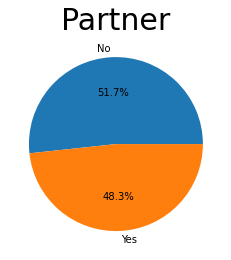

Dependents
Column:    Dependents  customerID
0         No        4933
1        Yes        2110


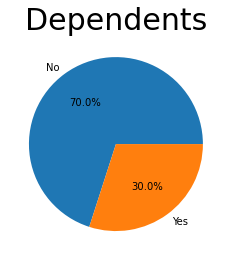

PhoneService
Column:    PhoneService  customerID
0           No         682
1          Yes        6361


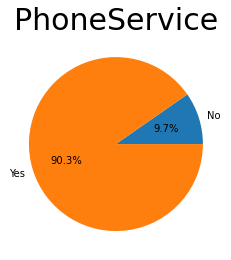

MultipleLines
Column:        MultipleLines  customerID
0                No        3390
1  No phone service         682
2               Yes        2971


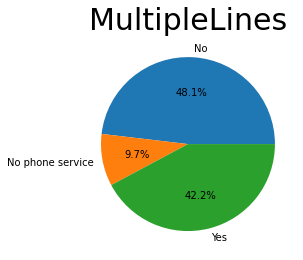

InternetService
Column:    InternetService  customerID
0             DSL        2421
1     Fiber optic        3096
2              No        1526


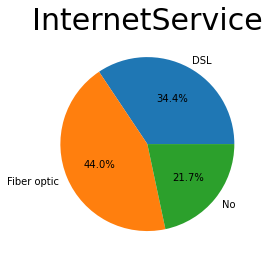

OnlineSecurity
Column:          OnlineSecurity  customerID
0                   No        3498
1  No internet service        1526
2                  Yes        2019


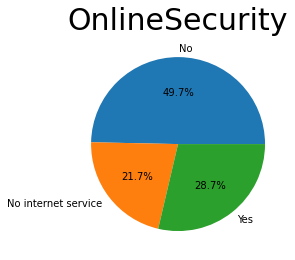

OnlineBackup
Column:            OnlineBackup  customerID
0                   No        3088
1  No internet service        1526
2                  Yes        2429


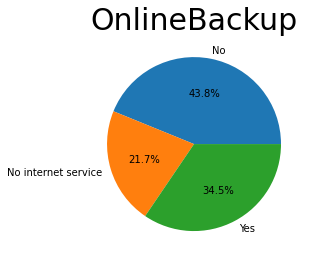

DeviceProtection
Column:        DeviceProtection  customerID
0                   No        3095
1  No internet service        1526
2                  Yes        2422


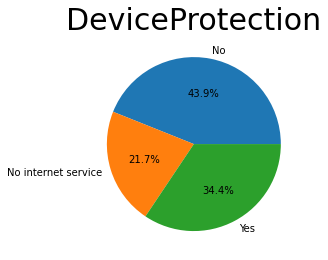

TechSupport
Column:             TechSupport  customerID
0                   No        3473
1  No internet service        1526
2                  Yes        2044


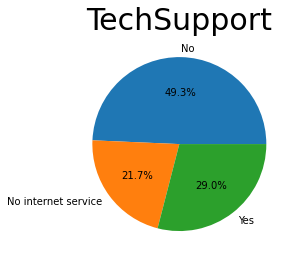

StreamingTV
Column:             StreamingTV  customerID
0                   No        2810
1  No internet service        1526
2                  Yes        2707


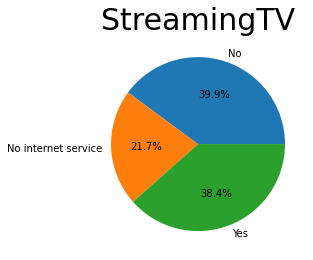

StreamingMovies
Column:         StreamingMovies  customerID
0                   No        2785
1  No internet service        1526
2                  Yes        2732


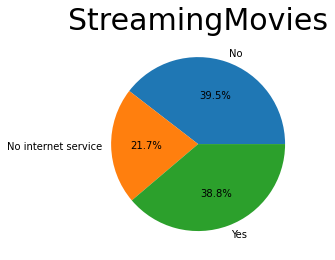

Contract
Column:           Contract  customerID
0  Month-to-month        3875
1        One year        1473
2        Two year        1695


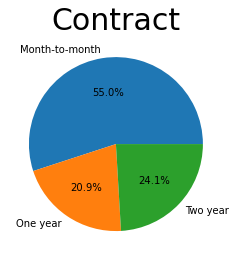

PaperlessBilling
Column:    PaperlessBilling  customerID
0               No        2872
1              Yes        4171


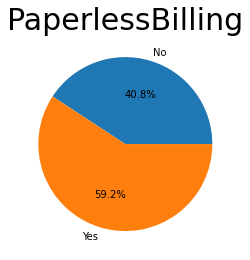

PaymentMethod
Column:                 PaymentMethod  customerID
0  Bank transfer (automatic)        1544
1    Credit card (automatic)        1522
2           Electronic check        2365
3               Mailed check        1612


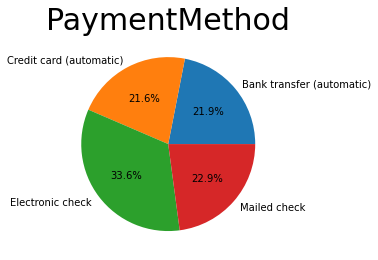

Churn
Column:    Churn  customerID
0    No        5174
1   Yes        1869


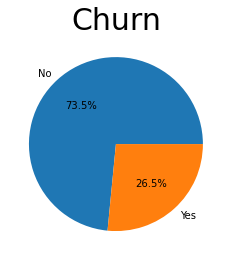

In [100]:
q_var = []
for col in churn_df:
        if col == 'customerID':
                continue
        elif col == 'tenure':
                continue
        elif col == 'MonthlyCharges':
                continue
        elif col == 'TotalCharges':
                continue
        else:
                print(col)
                q_var.append(fast_view(churn_df, col))
                

### Step 1: EDA
#### There are three groups of input variables:

- `Personal variables:`
    - gender
    - SeniorCitizen
    - Partner
    - Dependents

- `Products:`
    - PhoneService
    - MultipleLines
    - InternetService
    - OnlineSecurity
    - OnlineBackup
    - DeviceProtection
    - TechSupport
    - StreamingTV
    - StreamingMovies

- `Behaviour:`
    - tenure
    - Contract
    - PaperlessBilling
    - PaymentMethod
    - MonthlyCharges
    - TotalCharges

**The output is the `Churn`**



#### Transformación de variables
**Vamos a transformar las variables categóricas a numéricas:**
- `Variables dicotómicas:`
    - Valor = 'Yes' -> 1
    - Valor = 'No'  -> 0
- `Para las variables categóricas con n opciones, serán transformadas a valores entre [0..1]`


In [101]:
churn_df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [102]:
# Transformando las variables dicotómicas

churn_df['gender']= churn_df['gender'].replace('Male',1.0)
churn_df['gender']= churn_df['gender'].replace('Female' ,0.0)

churn_df['Partner']= churn_df['Partner'].replace('Yes',1.0)
churn_df['Partner']= churn_df['Partner'].replace('No' ,0.0)

churn_df['Dependents']= churn_df['Dependents'].replace('Yes',1.0)
churn_df['Dependents']= churn_df['Dependents'].replace('No' ,0.0)

churn_df['PhoneService']= churn_df['PhoneService'].replace('Yes',1.0)
churn_df['PhoneService']= churn_df['PhoneService'].replace('No' ,0.0)

churn_df['MultipleLines']= churn_df['MultipleLines'].replace('Yes',1.0)
churn_df['MultipleLines']= churn_df['MultipleLines'].replace('No' ,0.0)
churn_df['MultipleLines']= churn_df['MultipleLines'].replace('No phone service' ,0.0)

churn_df['InternetService']= churn_df['InternetService'].replace('Fiber optic',1.0)
churn_df['InternetService']= churn_df['InternetService'].replace('DSL' ,0.0)
churn_df['InternetService']= churn_df['InternetService'].replace('No' ,0.0)

churn_df['OnlineSecurity']= churn_df['OnlineSecurity'].replace('Yes',1.0)
churn_df['OnlineSecurity']= churn_df['OnlineSecurity'].replace('No' ,0.0)
churn_df['OnlineSecurity']= churn_df['OnlineSecurity'].replace('No internet service' ,0.0)

churn_df['OnlineBackup']= churn_df['OnlineBackup'].replace('Yes',1.0)
churn_df['OnlineBackup']= churn_df['OnlineBackup'].replace('No' ,0.0)
churn_df['OnlineBackup']= churn_df['OnlineBackup'].replace('No internet service' ,0.0)


churn_df['DeviceProtection']= churn_df['DeviceProtection'].replace('Yes',1.0)
churn_df['DeviceProtection']= churn_df['DeviceProtection'].replace('No' ,0.0)
churn_df['DeviceProtection']= churn_df['DeviceProtection'].replace('No internet service' ,0.0)

churn_df['TechSupport']= churn_df['TechSupport'].replace('Yes',1.0)
churn_df['TechSupport']= churn_df['TechSupport'].replace('No' ,0.0)
churn_df['TechSupport']= churn_df['TechSupport'].replace('No internet service' ,0.0)

churn_df['StreamingTV']= churn_df['StreamingTV'].replace('Yes',1.0)
churn_df['StreamingTV']= churn_df['StreamingTV'].replace('No' ,0.0)
churn_df['StreamingTV']= churn_df['StreamingTV'].replace('No internet service' ,0.0)

churn_df['StreamingMovies']= churn_df['StreamingMovies'].replace('Yes',1.0)
churn_df['StreamingMovies']= churn_df['StreamingMovies'].replace('No' ,0.0)
churn_df['StreamingMovies']= churn_df['StreamingMovies'].replace('No internet service' ,0.0)

churn_df['PaperlessBilling']= churn_df['PaperlessBilling'].replace('Yes',1.0)
churn_df['PaperlessBilling']= churn_df['PaperlessBilling'].replace('No' ,0.0)

churn_df['Churn']= churn_df['Churn'].replace('Yes',1.0)
churn_df['Churn']= churn_df['Churn'].replace('No' ,0.0)


churn_df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0.0,0,1.0,0.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Month-to-month,1.0,Electronic check,29.85,29.85,0.0
1,5575-GNVDE,1.0,0,0.0,0.0,34,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,One year,0.0,Mailed check,56.95,1889.5,0.0
2,3668-QPYBK,1.0,0,0.0,0.0,2,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,Month-to-month,1.0,Mailed check,53.85,108.15,1.0
3,7795-CFOCW,1.0,0,0.0,0.0,45,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,One year,0.0,Bank transfer (automatic),42.30,1840.75,0.0
4,9237-HQITU,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,Month-to-month,1.0,Electronic check,70.70,151.65,1.0
5,9305-CDSKC,0.0,0,0.0,0.0,8,1.0,1.0,1.0,0.0,...,1.0,0.0,1.0,1.0,Month-to-month,1.0,Electronic check,99.65,820.5,1.0
6,1452-KIOVK,1.0,0,0.0,1.0,22,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,Month-to-month,1.0,Credit card (automatic),89.10,1949.4,0.0
7,6713-OKOMC,0.0,0,0.0,0.0,10,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,Month-to-month,0.0,Mailed check,29.75,301.9,0.0
8,7892-POOKP,0.0,0,1.0,0.0,28,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,Month-to-month,1.0,Electronic check,104.80,3046.05,1.0
9,6388-TABGU,1.0,0,0.0,1.0,62,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,One year,0.0,Bank transfer (automatic),56.15,3487.95,0.0


In [103]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   float64
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   float64
 4   Dependents        7043 non-null   float64
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   float64
 7   MultipleLines     7043 non-null   float64
 8   InternetService   7043 non-null   float64
 9   OnlineSecurity    7043 non-null   float64
 10  OnlineBackup      7043 non-null   float64
 11  DeviceProtection  7043 non-null   float64
 12  TechSupport       7043 non-null   float64
 13  StreamingTV       7043 non-null   float64
 14  StreamingMovies   7043 non-null   float64
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   float64


In [104]:
# Transformando las variables no dicotómicas
# Como se verá más adelante los valores son elegidos en ese orden porque existe cierta correlación entre el valor 
# de las variables indicadas con 1
# Contract
churn_df['Contract']= churn_df['Contract'].replace('Month-to-month',1.0)
churn_df['Contract']= churn_df['Contract'].replace('One year' ,0.5)
churn_df['Contract']= churn_df['Contract'].replace('Two year' ,0.0)


# PaymentMethod
churn_df['PaymentMethod']= churn_df['PaymentMethod'].replace('Electronic check' ,1.0)
churn_df['PaymentMethod']= churn_df['PaymentMethod'].replace('Mailed check' ,0.75)
churn_df['PaymentMethod']= churn_df['PaymentMethod'].replace('Bank transfer (automatic)' ,0.5)
churn_df['PaymentMethod']= churn_df['PaymentMethod'].replace('Credit card (automatic)' ,0.0)

churn_df[['Contract','PaymentMethod']].head(10)

,Contract,PaymentMethod
0,1.0,1.00
1,0.5,0.75
2,1.0,0.75
3,0.5,0.50
4,1.0,1.00
5,1.0,1.00
6,1.0,0.00
7,1.0,0.75
8,1.0,1.00
9,0.5,0.50


In [105]:
# Variables continuas:
churn_df[['tenure','MonthlyCharges','TotalCharges']].head(10)

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.5
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
5,8,99.65,820.5
6,22,89.10,1949.4
7,10,29.75,301.9
8,28,104.80,3046.05
9,62,56.15,3487.95


In [106]:
# Vamos a sacar estadísticas con las variables continuas:
churn_df[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


In [107]:
# La variable TotalCharges no arroja estadísticas porque es de tipo objeto y podría tener nulos, veamos:
churn_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [108]:
idx = churn_df.index[churn_df['TotalCharges']==' ']
idx
print(churn_df.iloc[idx][['customerID','tenure','TotalCharges']])


      customerID  tenure TotalCharges
488   4472-LVYGI       0             
753   3115-CZMZD       0             
936   5709-LVOEQ       0             
1082  4367-NUYAO       0             
1340  1371-DWPAZ       0             
3331  7644-OMVMY       0             
3826  3213-VVOLG       0             
4380  2520-SGTTA       0             
5218  2923-ARZLG       0             
6670  4075-WKNIU       0             
6754  2775-SEFEE       0             


In [109]:
# Efectivamente no hay datos en esas filas, porque no tienen servicios, podemos eliminarlas.
# Comentario: Esto es común, porque muchos clientes solicitan el servicio, pero nunca se llega a instalar el servicio.

churn_df.drop(index=idx, inplace=True)
churn_df.reset_index(inplace=True)


In [110]:
churn_df[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges
count,7032.000000,7032.000000
mean,32.421786,64.798208
std,24.545260,30.085974
min,1.000000,18.250000
25%,9.000000,35.587500
50%,29.000000,70.350000
75%,55.000000,89.862500
max,72.000000,118.750000


In [111]:
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'], errors='coerce')

In [112]:
churn_df[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


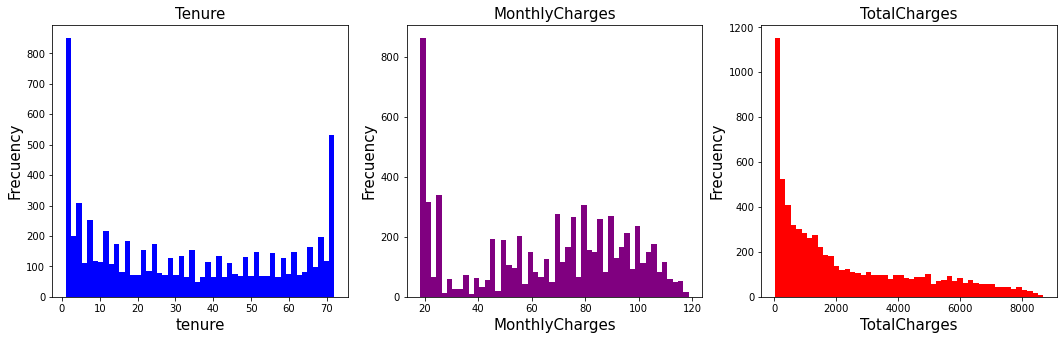

In [114]:
# Listo, podemos usar las tres columnas
fig = plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.set_title('Tenure',     fontsize=15)
ax1.hist(churn_df['tenure'],    bins=50, color='blue')  
ax1.set_xlabel('tenure',    fontsize=15)
ax1.set_ylabel('Frecuency', fontsize=15)

ax2.set_title('MonthlyCharges',  fontsize=15)
ax2.hist(churn_df['MonthlyCharges'], bins=50, color='purple')  
ax2.set_xlabel('MonthlyCharges', fontsize=15)
ax2.set_ylabel('Frecuency',      fontsize=15)

ax3.set_title('TotalCharges',  fontsize=15)
ax3.hist(churn_df['TotalCharges'], bins=50, color='red')  
ax3.set_xlabel('TotalCharges', fontsize=15)
ax3.set_ylabel('Frecuency',    fontsize=15)

plt.show()


Ninguno de los tres tiene una distribución uniforme, por lo que diviremos en grupos de rango homogéneo, 
pero ajustados para que tengan sentido comercia:
Los meses de permanencia (tenure) los vamos a dividir en 5 grupos, el primer grupo: 
- menor a 12 meses
- 12-24 
- 24-48 
- 48-60 
- mayor a 60 meses


In [115]:
# Tenure:
tenure_group = []
for i in churn_df['tenure']:
    if i < 12.0:
        group = 1/6
    elif (i >= 12.0) and (i < 24.0):
        group = 2/6
    elif (i >= 24.0) and (i < 36.0):
        group = 3/6
    elif (i >= 36.0) and (i < 48.0):
        group = 4/6
    elif (i >= 48.0) and (i < 60.0):
        group = 5/6
    elif i >= 60.0:
        group = 6/6
    tenure_group.append(group)

    

churn_df['tenure_group'] = tenure_group
churn_df[['tenure','tenure_group']].head(10).sort_values(by='tenure')
    
        

,tenure,tenure_group
0,1,0.166667
2,2,0.166667
4,2,0.166667
5,8,0.166667
7,10,0.166667
6,22,0.333333
8,28,0.500000
1,34,0.500000
3,45,0.666667
9,62,1.000000


In [116]:
# MonthlyCharges:
MonthlyCharges_group = []
for i in churn_df['MonthlyCharges']:
    if i < 18.0:
        group = 1/6
    elif (i >= 18.0) and (i < 33.0):
        group = 2/6
    elif (i >= 33.0) and (i < 50.0):
        group = 3/6
    elif (i >= 50.0) and (i < 67.0):
        group = 4/6
    elif (i >= 67.0) and (i < 83.0):
        group = 5/6
    elif i >= 83:
        group = 6/6
    MonthlyCharges_group.append(group)

churn_df['MonthlyCharges_group'] = MonthlyCharges_group
churn_df[['MonthlyCharges','MonthlyCharges_group']].head(10).sort_values(by='MonthlyCharges')
    

,MonthlyCharges,MonthlyCharges_group
7,29.75,0.333333
0,29.85,0.333333
3,42.30,0.500000
2,53.85,0.666667
9,56.15,0.666667
1,56.95,0.666667
4,70.70,0.833333
6,89.10,1.000000
5,99.65,1.000000
8,104.80,1.000000


In [117]:
# TotalCharges:
TotalCharges_group = []
for i in churn_df['TotalCharges']:
    if i < 1444.0:
        group = 1/6
    elif (i >= 1444.0) and (i < 2889.0):
        group = 2/6
    elif (i >= 2889.0) and (i < 4333.0):
        group = 3/6
    elif (i >= 4333.0) and (i < 5777.0):
        group = 4/6
    elif (i >= 5777.0) and (i < 7222.0):
        group = 5/6
    elif i >= 7222.0:
        group = 6/6
    TotalCharges_group.append(group)

churn_df['TotalCharges_group'] = TotalCharges_group
churn_df[['TotalCharges','TotalCharges_group']].head(10).sort_values(by='TotalCharges')
    

,TotalCharges,TotalCharges_group
0,29.85,0.166667
2,108.15,0.166667
4,151.65,0.166667
7,301.90,0.166667
5,820.50,0.166667
3,1840.75,0.333333
1,1889.50,0.333333
6,1949.40,0.333333
8,3046.05,0.500000
9,3487.95,0.500000


In [118]:
churn_df.head(10)

,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,MonthlyCharges_group,TotalCharges_group
0,0,7590-VHVEG,0.0,0,1.0,0.0,1,0.0,0.0,0.0,...,0.0,1.0,1.0,1.00,29.85,29.85,0.0,0.166667,0.333333,0.166667
1,1,5575-GNVDE,1.0,0,0.0,0.0,34,1.0,0.0,0.0,...,0.0,0.5,0.0,0.75,56.95,1889.50,0.0,0.500000,0.666667,0.333333
2,2,3668-QPYBK,1.0,0,0.0,0.0,2,1.0,0.0,0.0,...,0.0,1.0,1.0,0.75,53.85,108.15,1.0,0.166667,0.666667,0.166667
3,3,7795-CFOCW,1.0,0,0.0,0.0,45,0.0,0.0,0.0,...,0.0,0.5,0.0,0.50,42.30,1840.75,0.0,0.666667,0.500000,0.333333
4,4,9237-HQITU,0.0,0,0.0,0.0,2,1.0,0.0,1.0,...,0.0,1.0,1.0,1.00,70.70,151.65,1.0,0.166667,0.833333,0.166667
5,5,9305-CDSKC,0.0,0,0.0,0.0,8,1.0,1.0,1.0,...,1.0,1.0,1.0,1.00,99.65,820.50,1.0,0.166667,1.000000,0.166667
6,6,1452-KIOVK,1.0,0,0.0,1.0,22,1.0,1.0,1.0,...,0.0,1.0,1.0,0.00,89.10,1949.40,0.0,0.333333,1.000000,0.333333
7,7,6713-OKOMC,0.0,0,0.0,0.0,10,0.0,0.0,0.0,...,0.0,1.0,0.0,0.75,29.75,301.90,0.0,0.166667,0.333333,0.166667
8,8,7892-POOKP,0.0,0,1.0,0.0,28,1.0,1.0,1.0,...,1.0,1.0,1.0,1.00,104.80,3046.05,1.0,0.500000,1.000000,0.500000
9,9,6388-TABGU,1.0,0,0.0,1.0,62,1.0,0.0,0.0,...,0.0,0.5,0.0,0.50,56.15,3487.95,0.0,1.000000,0.666667,0.500000


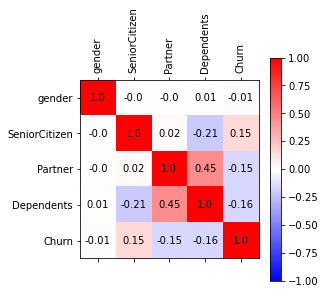

In [119]:
# Tres matrices de correlación
# Matriz 1: El grupo de variables de entrada relacionadas con la información personal, es decir:
# gender, SeniorCitizen, Partner, Dependents:

sub_df1 = churn_df[['gender','SeniorCitizen','Partner','Dependents','Churn']]
corr_matrix = sub_df1.corr()
plt.matshow(corr_matrix, cmap="bwr", vmin=-1, vmax=1) # bwr -1 0 +1
plt.xticks(range(5), sub_df1.columns, rotation=90)
plt.yticks(range(5), sub_df1.columns)

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(i,j,round(corr_matrix.iloc[i,j],2),
                ha="center", va="center")

plt.colorbar()
plt.show()

**Matriz 1: Conclusiones**

Ninguna de las varMatriz 1: Conclusiones

Ninguna de las variables relacionadas con la información personal tiene una alta correlación con el churn, por lo que podemos descartarlas inicialmente en el análisisiables relacionadas con la información personal tiene una alta correlación con el churn, por lo que podemos descartarlas inicialmente en el análisis




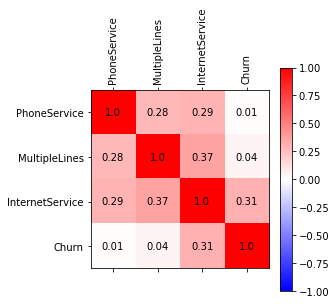

In [120]:
# Matriz 2: El grupo de variables de entrada relacionadas con los productos de cada cliente, es decir:
# PhoneService, MultipleLines, InternetService.
sub_df1 = churn_df[['PhoneService','MultipleLines','InternetService','Churn']]
corr_matrix = sub_df1.corr()
plt.matshow(corr_matrix, cmap="bwr", vmin=-1, vmax=1) # bwr -1 0 +1
plt.xticks(range(4), sub_df1.columns, rotation=90)
plt.yticks(range(4), sub_df1.columns)

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(i,j,round(corr_matrix.iloc[i,j],2),
                ha="center", va="center")

plt.colorbar()
plt.show()

**Matriz 2: Conclusiones**

Ninguna de las variables relacionadas con el servicio tiene una alta correlación con el churn, y esto es porque la tenencia de servicio le da sentido al cliente, no tendría
razón de ser un cliente sin servicio de internet o telefonía, por lo tanto no serán parte del modelo.





In [121]:

# Existe un grupo de variables de entrada relacionadas con el productos pero que pueden aportan valor, porque son servicios de valor añadido, son opcionales y adicionales al producto principal, estos son:
# OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

added_value = churn_df['OnlineSecurity'] + churn_df['OnlineBackup'] + churn_df['DeviceProtection'] + churn_df['TechSupport'] + churn_df['StreamingTV'] + churn_df['StreamingMovies']
churn_df['added_value'] = added_value/6

churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 7032 non-null   int64  
 1   customerID            7032 non-null   object 
 2   gender                7032 non-null   float64
 3   SeniorCitizen         7032 non-null   int64  
 4   Partner               7032 non-null   float64
 5   Dependents            7032 non-null   float64
 6   tenure                7032 non-null   int64  
 7   PhoneService          7032 non-null   float64
 8   MultipleLines         7032 non-null   float64
 9   InternetService       7032 non-null   float64
 10  OnlineSecurity        7032 non-null   float64
 11  OnlineBackup          7032 non-null   float64
 12  DeviceProtection      7032 non-null   float64
 13  TechSupport           7032 non-null   float64
 14  StreamingTV           7032 non-null   float64
 15  StreamingMovies      

In [122]:
churn_df['added_value'].unique()

array([0.16666667, 0.33333333, 0.5       , 0.        , 0.66666667,
       0.83333333, 1.        ])

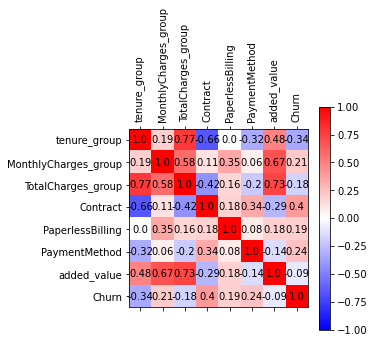

In [123]:
# Matriz 3: El grupo de variables de entrada relacionadas con los productos de cada cliente, es decir:
# tenure, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges llevados a los grupos creados, es decir:
# tenure_group, MonthlyCharges_group, TotalCharges_group y Contract, PaperlessBilling, PaymentMethod permanecen iguales. 
# Ademas se ha adicionado la columna de servicios de valor agregado 'added_value'

sub_df1 = churn_df[['tenure_group','MonthlyCharges_group','TotalCharges_group','Contract','PaperlessBilling','PaymentMethod','added_value','Churn']]
corr_matrix = sub_df1.corr()
plt.matshow(corr_matrix, cmap="bwr", vmin=-1, vmax=1) # bwr -1 0 +1
plt.xticks(range(8), sub_df1.columns, rotation=90)
plt.yticks(range(8), sub_df1.columns)

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(i,j,round(corr_matrix.iloc[i,j],2),
                ha="center", va="center")

plt.colorbar()
plt.show()

**Matriz 3: Conclusiones**

Total las variables de comportamiento tienen correlaciones considerables, por lo que no deben descartarse, sin embargo, existen algunos hallazgos:

    - La correlación entre tenure_group y TotalCharges_group es alta = 0.77.
    - La correlación entre tenure_group y Contract = - 0.66.

Esto podría indicar que esas variables aportan la misma información al modelo y podrían reducirse, para lo cual vamos a realizar un gráfico de correlación:
    
    

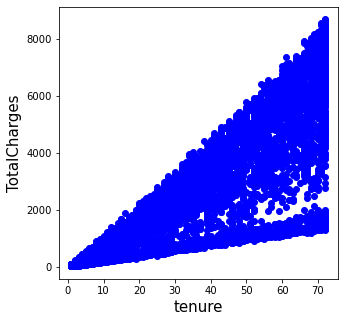

In [125]:
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(1,1,1)

ax1.scatter(churn_df['tenure'], churn_df['TotalCharges'], color='blue')
ax1.set_xlabel('tenure',    fontsize=15)
ax1.set_ylabel('TotalCharges', fontsize=15)

plt.show()

**Reducción en la matriz 3**

La variable TotalCharges nos indica la facturación acumulada por cada cliente, sin embargo no aporta al modelo información adicional, bastaría con sólo mantener la variable 'tenure' en el modelo.

Por otro lado, la variable sólo tiene 3 posibles valores (Month-to-month, one year, two year), está variable obliga a los clientes a permanecer por lo tanto si aporta al modelo, vamos a mantenerla.






### Dataframe para elaborar el modelo:


In [126]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 7032 non-null   int64  
 1   customerID            7032 non-null   object 
 2   gender                7032 non-null   float64
 3   SeniorCitizen         7032 non-null   int64  
 4   Partner               7032 non-null   float64
 5   Dependents            7032 non-null   float64
 6   tenure                7032 non-null   int64  
 7   PhoneService          7032 non-null   float64
 8   MultipleLines         7032 non-null   float64
 9   InternetService       7032 non-null   float64
 10  OnlineSecurity        7032 non-null   float64
 11  OnlineBackup          7032 non-null   float64
 12  DeviceProtection      7032 non-null   float64
 13  TechSupport           7032 non-null   float64
 14  StreamingTV           7032 non-null   float64
 15  StreamingMovies      

In [127]:
df_to_model = churn_df[['customerID', 'tenure_group','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges_group','added_value','Churn']]
# df_to_model.to_csv('df_model')
df_to_model.head(10)



,customerID,tenure_group,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges_group,added_value,Churn
0,7590-VHVEG,0.166667,1.0,1.0,1.00,0.333333,0.166667,0.0
1,5575-GNVDE,0.500000,0.5,0.0,0.75,0.666667,0.333333,0.0
2,3668-QPYBK,0.166667,1.0,1.0,0.75,0.666667,0.333333,1.0
3,7795-CFOCW,0.666667,0.5,0.0,0.50,0.500000,0.500000,0.0
4,9237-HQITU,0.166667,1.0,1.0,1.00,0.833333,0.000000,1.0
5,9305-CDSKC,0.166667,1.0,1.0,1.00,1.000000,0.500000,1.0
6,1452-KIOVK,0.333333,1.0,1.0,0.00,1.000000,0.333333,0.0
7,6713-OKOMC,0.166667,1.0,0.0,0.75,0.333333,0.166667,0.0
8,7892-POOKP,0.500000,1.0,1.0,1.00,1.000000,0.666667,1.0
9,6388-TABGU,1.000000,0.5,0.0,0.50,0.666667,0.333333,0.0


### Variables para el modelo

- `Variables de entrada:`
    - tenure_group
    - Contract
    - PaperlessBilling
    - PaymentMethod
    - MonthlyCharges_group
    - added_value

**The output is the `Churn`**



### Step 2: Modelamiento

In [128]:
df_to_model[['tenure_group','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges_group','added_value','Churn']].describe()

,tenure_group,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges_group,added_value,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.539676,0.655717,0.592719,0.617036,0.719544,0.339685,0.265785
std,0.322070,0.416467,0.491363,0.372468,0.264000,0.307860,0.441782
min,0.166667,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000
25%,0.166667,0.500000,0.000000,0.500000,0.500000,0.000000,0.000000
50%,0.500000,1.000000,1.000000,0.750000,0.833333,0.333333,0.000000
75%,0.833333,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


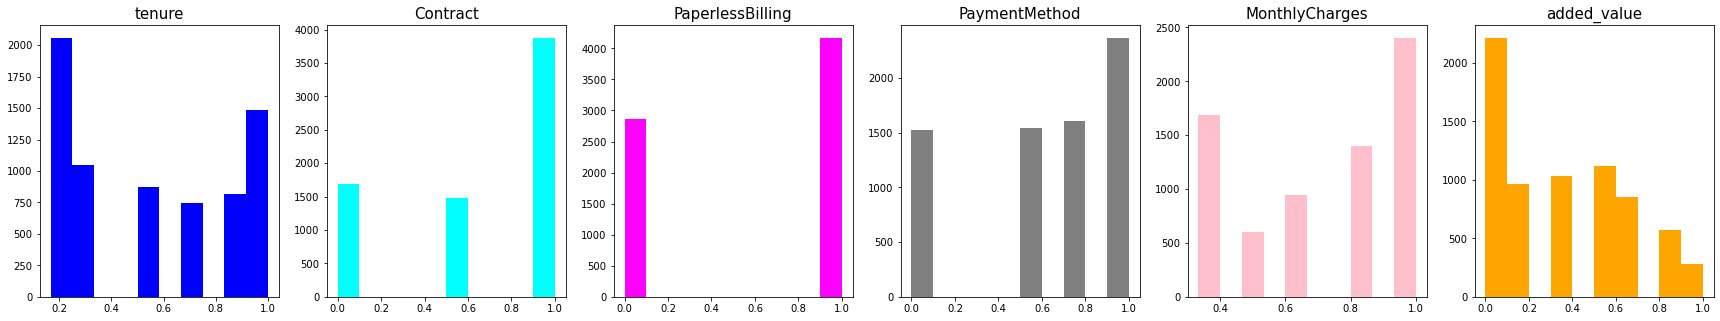

In [129]:
fig = plt.figure(figsize=(30,5))
ax1 = fig.add_subplot(1,6,1)
ax2 = fig.add_subplot(1,6,2)
ax3 = fig.add_subplot(1,6,3)
ax4 = fig.add_subplot(1,6,4)
ax5 = fig.add_subplot(1,6,5)
ax6 = fig.add_subplot(1,6,6)

ax1.hist(df_to_model['tenure_group'], color='blue')
ax1.set_title('tenure',    fontsize=15)

ax2.hist(df_to_model['Contract'], color='cyan')
ax2.set_title('Contract',    fontsize=15)

ax3.hist(df_to_model['PaperlessBilling'], color='magenta')
ax3.set_title('PaperlessBilling',    fontsize=15)

ax4.hist(df_to_model['PaymentMethod'], color='gray')
ax4.set_title('PaymentMethod',    fontsize=15)

ax5.hist(df_to_model['MonthlyCharges_group'], color='pink')
ax5.set_title('MonthlyCharges',    fontsize=15)

ax6.hist(df_to_model['added_value'], color='orange')
ax6.set_title('added_value',    fontsize=15)

plt.show()

### Modelos elegidos:
Tenemos 6 entradas y 1 salida. El modelo debe ser capaz de predecir si un cliente abandona la compañía (churn = 1) o no lo hace (churn = 0), los mejores modelos para realizar suelen ser:
    
- `Redes Neuronales`
- `Regresión logística`


### 0- Separar la data para entrenamiento y para test

In [130]:
# Seleccionar el 80% de los datos para entrenar y 20% para validar el modelo:

from sklearn.model_selection import train_test_split
x_training, x_test, y_training, y_test =  train_test_split(df_to_model[['tenure_group','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges_group','added_value']], 
                                                                         df_to_model['Churn'], 
                                                                         test_size=0.20)


In [131]:
print('Tamaño de toda la base                     : ', len(df_to_model))
print('Tamaño de la base de entradas para entrenar: ', len(x_training))
print('Tamaño de la base de salidas para entrenar : ', len(y_training))
print('Tamaño de la base de entradas para validar : ', len(x_test))
print('Tamaño de la base de salidas para validar  : ', len(y_test))


Tamaño de toda la base                     :  7032
Tamaño de la base de entradas para entrenar:  5625
Tamaño de la base de salidas para entrenar :  5625
Tamaño de la base de entradas para validar :  1407
Tamaño de la base de salidas para validar  :  1407


### 1 - Modelo con Redes Neuronales:

In [132]:
# Perceptron
perceptron = Perceptron().fit(x_training, y_training)
y_estimado = perceptron.predict(x_test)


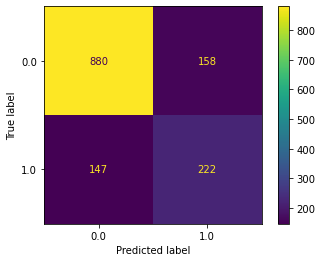

In [133]:
plot_confusion_matrix(perceptron, x_test, y_test)

In [134]:
y_estimado.sum()

380.0

In [136]:
error = y_test - y_estimado
error = error * error
error.sum()

305.0

### 2 - Modelo de Regresión logística

In [137]:
sorter = LogisticRegression()
sorter.fit(x_training, y_training)
y_estimado_rl = sorter.predict(x_test)


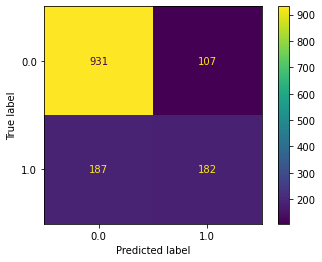

In [138]:
plot_confusion_matrix(sorter, x_test, y_test)

In [139]:
accuracy_rl = accuracy_score(y_estimado_rl, y_test)*100
print('El accuaracy es: %0.2f' % accuracy_rl,'%')


El accuaracy es: 79.10 %


### Conclusión

 1- Ambos modelos son buenos para predecir quienes no abandonarán el servicio con la empresa (churn = 0), pero no para predecir quienes abandonaran la empresa (churn=1), esto puede deberse a qué la data está desbalanceada, es decir, tenemos más datos con personas que no abandonan el servicio, que los que si abandonan.
 
 2- El modelo de regresión lineal está clasificando mejor que la red neuronal.
 
 En necesario hacer un fine-tunning en los modelos.
 


###  II - Tunning

#### Vamos a balancear la base de datos, con igual cantidad de casos para churn = 0 y churn = 1.

In [140]:
df_to_model_tunning_1 = df_to_model[df_to_model['Churn']==1.0]
df_to_model_tunning_1.count()

customerID              1869
tenure_group            1869
Contract                1869
PaperlessBilling        1869
PaymentMethod           1869
MonthlyCharges_group    1869
added_value             1869
Churn                   1869
dtype: int64

In [141]:
df_to_model_tunning_0 = df_to_model[df_to_model['Churn']==0.0]
df_to_model_tunning_0.count()

customerID              5163
tenure_group            5163
Contract                5163
PaperlessBilling        5163
PaymentMethod           5163
MonthlyCharges_group    5163
added_value             5163
Churn                   5163
dtype: int64

In [142]:
from sklearn.model_selection import train_test_split
x_training_0, x_test_0, y_training_0, y_test_0 =  train_test_split(df_to_model_tunning_0[['tenure_group','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges_group','added_value']], 
                                                                         df_to_model_tunning_0['Churn'], 
                                                                         test_size=0.638)

In [143]:
x_training_0

,tenure_group,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges_group,added_value
5135,0.833333,0.5,1.0,0.75,1.000000,1.000000
1663,0.666667,1.0,1.0,1.00,1.000000,1.000000
5012,0.666667,0.0,1.0,0.75,0.333333,0.000000
909,0.333333,1.0,0.0,0.00,1.000000,0.333333
4138,0.333333,1.0,0.0,0.50,0.833333,0.666667
...,...,...,...,...,...,...
1421,1.000000,0.5,1.0,1.00,1.000000,0.666667
557,0.166667,1.0,0.0,1.00,0.833333,0.000000
4371,1.000000,0.5,1.0,0.50,0.333333,0.000000
2728,0.166667,1.0,1.0,0.75,0.666667,0.166667


In [144]:
y_training_0

5135    0.0
1663    0.0
5012    0.0
909     0.0
4138    0.0
       ... 
1421    0.0
557     0.0
4371    0.0
2728    0.0
6209    0.0
Name: Churn, Length: 1869, dtype: float64

In [147]:
x_training_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1869 entries, 5135 to 6209
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tenure_group          1869 non-null   float64
 1   Contract              1869 non-null   float64
 2   PaperlessBilling      1869 non-null   float64
 3   PaymentMethod         1869 non-null   float64
 4   MonthlyCharges_group  1869 non-null   float64
 5   added_value           1869 non-null   float64
dtypes: float64(6)
memory usage: 102.2 KB


In [155]:
y_training_0.head()

5135    0.0
1663    0.0
5012    0.0
909     0.0
4138    0.0
Name: Churn, dtype: float64

In [149]:
x_training_0['Churn'] = y_training_0

In [150]:
x_training_0.tail(10)

,tenure_group,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges_group,added_value,Churn
4976,0.666667,1.0,0.0,0.50,0.666667,0.500000,0.0
1425,0.333333,0.5,0.0,0.00,0.333333,0.000000,0.0
4186,0.166667,1.0,0.0,0.00,0.333333,0.000000,0.0
2235,1.000000,0.0,1.0,0.00,1.000000,1.000000,0.0
6189,0.500000,0.0,0.0,0.00,0.333333,0.000000,0.0
1421,1.000000,0.5,1.0,1.00,1.000000,0.666667,0.0
557,0.166667,1.0,0.0,1.00,0.833333,0.000000,0.0
4371,1.000000,0.5,1.0,0.50,0.333333,0.000000,0.0
2728,0.166667,1.0,1.0,0.75,0.666667,0.166667,0.0
6209,1.000000,0.5,1.0,0.50,0.666667,0.833333,0.0


In [151]:
frames = [df_to_model_tunning_1, x_training_0]

df_to_model_tunning = pd.concat(frames)

In [152]:
df_to_model_tunning

,customerID,tenure_group,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges_group,added_value,Churn
2,3668-QPYBK,0.166667,1.0,1.0,0.75,0.666667,0.333333,1.0
4,9237-HQITU,0.166667,1.0,1.0,1.00,0.833333,0.000000,1.0
5,9305-CDSKC,0.166667,1.0,1.0,1.00,1.000000,0.500000,1.0
8,7892-POOKP,0.500000,1.0,1.0,1.00,1.000000,0.666667,1.0
13,0280-XJGEX,0.833333,1.0,1.0,0.50,1.000000,0.666667,1.0
...,...,...,...,...,...,...,...,...
1421,NaN,1.000000,0.5,1.0,1.00,1.000000,0.666667,0.0
557,NaN,0.166667,1.0,0.0,1.00,0.833333,0.000000,0.0
4371,NaN,1.000000,0.5,1.0,0.50,0.333333,0.000000,0.0
2728,NaN,0.166667,1.0,1.0,0.75,0.666667,0.166667,0.0


In [153]:
df_to_model_tunning.drop(['customerID'], axis=1, inplace=True)
df_to_model_tunning

,tenure_group,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges_group,added_value,Churn
2,0.166667,1.0,1.0,0.75,0.666667,0.333333,1.0
4,0.166667,1.0,1.0,1.00,0.833333,0.000000,1.0
5,0.166667,1.0,1.0,1.00,1.000000,0.500000,1.0
8,0.500000,1.0,1.0,1.00,1.000000,0.666667,1.0
13,0.833333,1.0,1.0,0.50,1.000000,0.666667,1.0
...,...,...,...,...,...,...,...
1421,1.000000,0.5,1.0,1.00,1.000000,0.666667,0.0
557,0.166667,1.0,0.0,1.00,0.833333,0.000000,0.0
4371,1.000000,0.5,1.0,0.50,0.333333,0.000000,0.0
2728,0.166667,1.0,1.0,0.75,0.666667,0.166667,0.0


### Tunning
### 0- Separar la data para entrenamiento y para test

In [156]:
from sklearn.model_selection import train_test_split
x_training, x_test, y_training, y_test =  train_test_split(df_to_model_tunning[['tenure_group','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges_group','added_value']], 
                                                                         df_to_model_tunning['Churn'], 
                                                                         test_size=0.2)


### 1 - Redes Neuronales

El accuracy es: 79.10 %


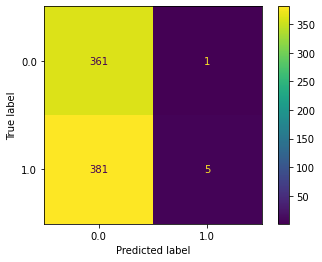

In [157]:
# Perceptron
perceptron = Perceptron().fit(x_training, y_training)
y_estimado = perceptron.predict(x_test)
plot_confusion_matrix(perceptron, x_test, y_test)
accuracy_nn = accuracy_score(y_estimado, y_test)*100
print('El accuracy es: %0.2f' % accuracy_rl,'%')

In [158]:
print('Negativos correctos: %0.2f' % (250/(250+72)*100),'%')
print('Negativos falsos   : %0.2f' % (72 /(250+72)*100),'%')
print('Positivos falsos   : %0.2f' % (121/(121+305)*100),'%')
print('Positivos correctos: %0.2f' % (305/(121+305)*100),'%')

Negativos correctos: 77.64 %
Negativos falsos   : 22.36 %
Positivos falsos   : 28.40 %
Positivos correctos: 71.60 %


### 2- Regresión Lineal

El accuracy es: 72.86 %


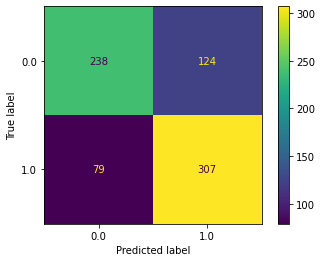

In [159]:
sorter = LogisticRegression()
sorter.fit(x_training, y_training)
y_estimado_rl = sorter.predict(x_test)
plot_confusion_matrix(sorter, x_test, y_test)
accuracy_rl = accuracy_score(y_estimado_rl, y_test)*100
print('El accuracy es: %0.2f' % accuracy_rl,'%')

In [160]:
print('Negativos correctos: %0.2f' % (257/(257+62)*100),'%')
print('Negativos falsos   : %0.2f' % (62 /(257+62)*100),'%')
print('Positivos falsos   : %0.2f' % (114/(114+315)*100),'%')
print('Positivos correctos: %0.2f' % (315/(114+315)*100),'%')

Negativos correctos: 80.56 %
Negativos falsos   : 19.44 %
Positivos falsos   : 26.57 %
Positivos correctos: 73.43 %


### Conclusión del Tunning

Ambos modelos clasifican bien y con resultados similares. El modelo ya podría estar listo, funciona!

### III - ¿Podemos reducir variables?

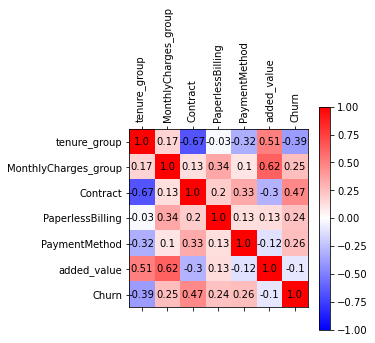

In [161]:
sub_df1 = df_to_model_tunning[['tenure_group','MonthlyCharges_group','Contract','PaperlessBilling','PaymentMethod','added_value','Churn']]
corr_matrix = sub_df1.corr()
plt.matshow(corr_matrix, cmap="bwr", vmin=-1, vmax=1) # bwr -1 0 +1
plt.xticks(range(7), sub_df1.columns, rotation=90)
plt.yticks(range(7), sub_df1.columns)

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(i,j,round(corr_matrix.iloc[i,j],2),
                ha="center", va="center")

plt.colorbar()
plt.show()





Podemos eliminar las entradas: MonthlyCharges_group, PaperlessBilling, added_value y verificar si el resultado no varía, es decir si los modelos pueden seguir prediciendo con alta exactitud
    

El accuracy es: 72.86 %
El accuracy es: 72.19 %


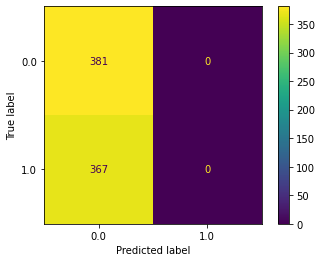

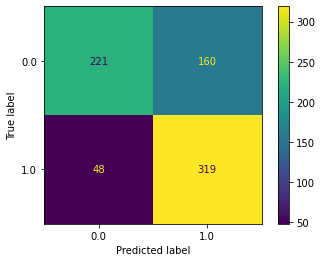

In [162]:
# Separamos las variables para entrenamiento y test:

from sklearn.model_selection import train_test_split
x_training, x_test, y_training, y_test =  train_test_split(df_to_model_tunning[['tenure_group','Contract','PaymentMethod']], 
                                                                         df_to_model_tunning['Churn'], 
                                                                         test_size=0.2)

# Perceptron
perceptron = Perceptron().fit(x_training, y_training)
y_estimado = perceptron.predict(x_test)
plot_confusion_matrix(perceptron, x_test, y_test)
accuracy_nn = accuracy_score(y_estimado, y_test)*100
print('El accuracy es: %0.2f' % accuracy_rl,'%')

# Regresión lineal
sorter = LogisticRegression()
sorter.fit(x_training, y_training)
y_estimado_rl = sorter.predict(x_test)
plot_confusion_matrix(sorter, x_test, y_test)
accuracy_rl = accuracy_score(y_estimado_rl, y_test)*100
print('El accuracy es: %0.2f' % accuracy_rl,'%')


In [163]:
print('Negativos correctos: %0.2f' % (225/(225+52)*100),'%')
print('Negativos falsos   : %0.2f' % (52 /(225+52)*100),'%')
print('Positivos falsos   : %0.2f' % (153/(153+318)*100),'%')
print('Positivos correctos: %0.2f' % (318/(153+318)*100),'%')

Negativos correctos: 81.23 %
Negativos falsos   : 18.77 %
Positivos falsos   : 32.48 %
Positivos correctos: 67.52 %


### Conclusión:

Claramente la red neuronal se ha desbalanceado, sin embargo la regresión logística sólo ha perdido un poco de exactitud al eliminar variables.
Probemos eliminando la variable 'PaymentMethod' y observamos que tanto accuracy perdemos.


El accuracy es: 72.19 %
El accuracy es: 72.06 %


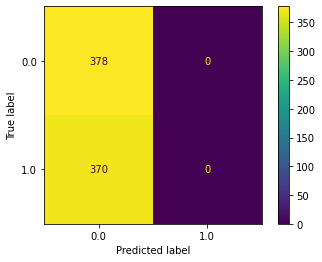

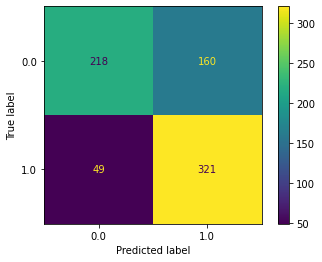

In [164]:
# Separamos las variables para entrenamiento y test:

from sklearn.model_selection import train_test_split
x_training, x_test, y_training, y_test =  train_test_split(df_to_model_tunning[['tenure_group','Contract']], 
                                                                         df_to_model_tunning['Churn'], 
                                                                         test_size=0.2)

# Perceptron
perceptron = Perceptron().fit(x_training, y_training)
y_estimado = perceptron.predict(x_test)
plot_confusion_matrix(perceptron, x_test, y_test)
accuracy_nn = accuracy_score(y_estimado, y_test)*100
print('El accuracy es: %0.2f' % accuracy_rl,'%')

# Regresión lineal
sorter = LogisticRegression()
sorter.fit(x_training, y_training)
y_estimado_rl = sorter.predict(x_test)
plot_confusion_matrix(sorter, x_test, y_test)
accuracy_rl = accuracy_score(y_estimado_rl, y_test)*100
print('El accuracy es: %0.2f' % accuracy_rl,'%')


In [165]:
print('Negativos correctos: %0.2f' % (207/(207+39)*100),'%')
print('Negativos falsos   : %0.2f' % (39 /(207+39)*100),'%')
print('Positivos falsos   : %0.2f' % (167/(167+335)*100),'%')
print('Positivos correctos: %0.2f' % (335/(167+335)*100),'%')

Negativos correctos: 84.15 %
Negativos falsos   : 15.85 %
Positivos falsos   : 33.27 %
Positivos correctos: 66.73 %


### Conclusión:

La red neuronal mejora para predecir churn = 1, sin embargo pierde mucha precisión y empieza a evaluar falsos clientes churns.
La regresión logística es más robusta, pero desciente un poco la predicción para clientes con churn = 1.

### Tuninng - Modelo final

El accuracy red neuronal es: 72.06 %
El accuracy para regresión log es: 71.79 %


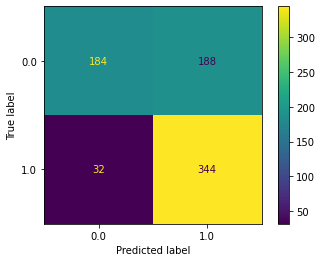

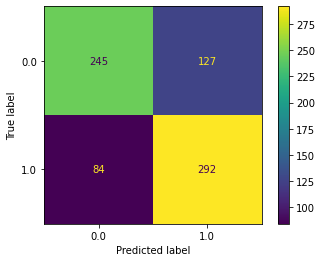

In [166]:
from sklearn.model_selection import train_test_split
x_training, x_test, y_training, y_test =  train_test_split(df_to_model_tunning[['tenure_group','Contract',
                                                                                'PaperlessBilling','PaymentMethod',
                                                                                'MonthlyCharges_group', 'added_value']], 
                                                                         df_to_model_tunning['Churn'], 
                                                                         test_size=0.2)
# Perceptron
perceptron = Perceptron().fit(x_training, y_training)
y_estimado = perceptron.predict(x_test)
plot_confusion_matrix(perceptron, x_test, y_test)
accuracy_nn = accuracy_score(y_estimado, y_test)*100
print('El accuracy red neuronal es: %0.2f' % accuracy_rl,'%')

# Regresión lineal
sorter = LogisticRegression()
sorter.fit(x_training, y_training)
y_estimado_rl = sorter.predict(x_test)
plot_confusion_matrix(sorter, x_test, y_test)
accuracy_rl = accuracy_score(y_estimado_rl, y_test)*100
print('El accuracy para regresión log es: %0.2f' % accuracy_rl,'%')



In [167]:
# Red neuronal
print('Negativos correctos: %0.2f' % (295/(295+124)*100),'%')
print('Negativos falsos   : %0.2f' % (124 /(295+124)*100),'%')
print('Positivos falsos   : %0.2f' % (85/(85+244)*100),'%')
print('Positivos correctos: %0.2f' % (244/(85+244)*100),'%')

Negativos correctos: 70.41 %
Negativos falsos   : 29.59 %
Positivos falsos   : 25.84 %
Positivos correctos: 74.16 %


In [168]:
# Regresión Logística
print('Negativos correctos: %0.2f' % (253/(253+66)*100),'%')
print('Negativos falsos   : %0.2f' % (66 /(253+66)*100),'%')
print('Positivos falsos   : %0.2f' % (127/(127+302)*100),'%')
print('Positivos correctos: %0.2f' % (302/(127+302)*100),'%')

Negativos correctos: 79.31 %
Negativos falsos   : 20.69 %
Positivos falsos   : 29.60 %
Positivos correctos: 70.40 %


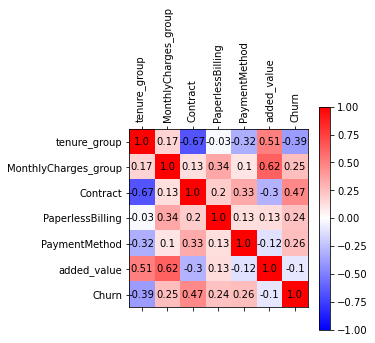

In [169]:
sub_df1 = df_to_model_tunning[['tenure_group','MonthlyCharges_group','Contract','PaperlessBilling','PaymentMethod','added_value','Churn']]
corr_matrix = sub_df1.corr()
plt.matshow(corr_matrix, cmap="bwr", vmin=-1, vmax=1) # bwr -1 0 +1
plt.xticks(range(7), sub_df1.columns, rotation=90)
plt.yticks(range(7), sub_df1.columns)

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(i,j,round(corr_matrix.iloc[i,j],2),
                ha="center", va="center")

plt.colorbar()
plt.show()


### Conclusión:

El modelo quedo así:
    - ´Entradas´ (6): ['tenure_group','MonthlyCharges_group','Contract','PaperlessBilling','PaymentMethod','added_value']
    - ´Salidas´  (1) : ['Churn']

Accuraccy > 73%

Siendo las variables más fuertes: ['tenure_group','Contract']
    
Se recomienda utilizar el modelo de regresión logística por ser más robusto que el modelo de redes neuronales.



In [170]:
df_to_model_tunning.head()

,tenure_group,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges_group,added_value,Churn
2,0.166667,1.0,1.0,0.75,0.666667,0.333333,1.0
4,0.166667,1.0,1.0,1.00,0.833333,0.000000,1.0
5,0.166667,1.0,1.0,1.00,1.000000,0.500000,1.0
8,0.500000,1.0,1.0,1.00,1.000000,0.666667,1.0
13,0.833333,1.0,1.0,0.50,1.000000,0.666667,1.0


In [183]:
df_output = x_test
df_output['y_estimado'] = y_estimado
df_output['y_estimado_rl'] = y_estimado_rl
print(len(df_output))
print(len(y_estimado))
print(len(y_estimado_rl))
df_output.head()


748
748
748


,tenure_group,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges_group,added_value,y_estimado,y_estimado_rl
6701,0.833333,1.0,1.0,1.00,1.000000,0.500000,1.0,1.0
484,0.166667,1.0,1.0,1.00,1.000000,0.333333,1.0,1.0
4595,0.166667,1.0,0.0,0.75,0.500000,0.333333,1.0,0.0
3305,0.166667,1.0,0.0,1.00,0.833333,0.166667,1.0,1.0
4750,0.833333,0.0,0.0,0.50,0.333333,0.000000,0.0,0.0


In [186]:
df_output['y_test'] = y_test



In [187]:
df_output.to_csv('df_output')

In [188]:
df_output.head()

,tenure_group,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges_group,added_value,y_estimado,y_estimado_rl,y_test
6701,0.833333,1.0,1.0,1.00,1.000000,0.500000,1.0,1.0,0.0
484,0.166667,1.0,1.0,1.00,1.000000,0.333333,1.0,1.0,1.0
4595,0.166667,1.0,0.0,0.75,0.500000,0.333333,1.0,0.0,0.0
3305,0.166667,1.0,0.0,1.00,0.833333,0.166667,1.0,1.0,1.0
4750,0.833333,0.0,0.0,0.50,0.333333,0.000000,0.0,0.0,0.0


### Des-escalar las variables

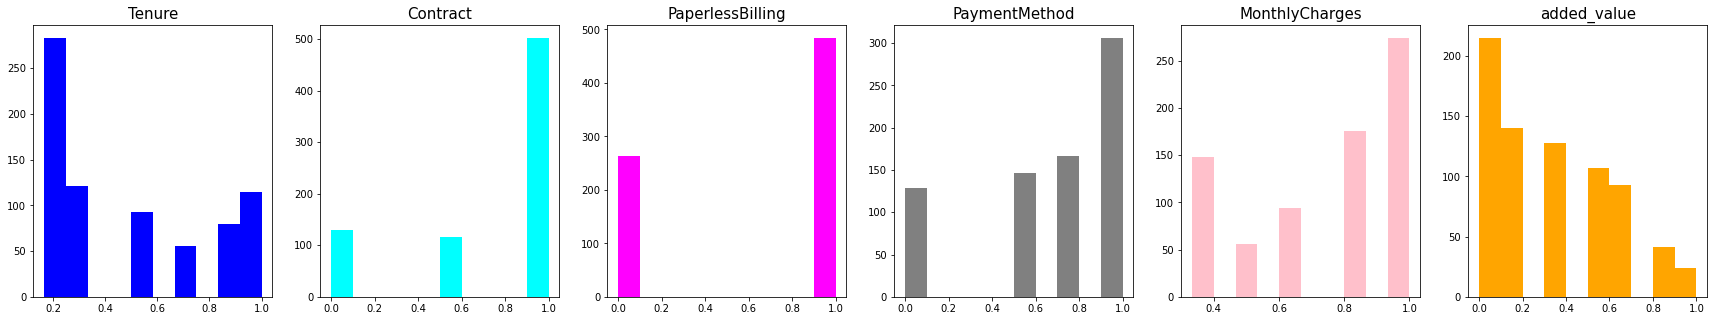

In [191]:
fig = plt.figure(figsize=(30,5))
ax1 = fig.add_subplot(1,6,1)
ax2 = fig.add_subplot(1,6,2)
ax3 = fig.add_subplot(1,6,3)
ax4 = fig.add_subplot(1,6,4)
ax5 = fig.add_subplot(1,6,5)
ax6 = fig.add_subplot(1,6,6)

ax1.hist(df_output['tenure_group'], color='blue')
ax1.set_title('Tenure',    fontsize=15)

ax2.hist(df_output['Contract'], color='cyan')
ax2.set_title('Contract',    fontsize=15)

ax3.hist(df_output['PaperlessBilling'], color='magenta')
ax3.set_title('PaperlessBilling',    fontsize=15)

ax4.hist(df_output['PaymentMethod'], color='gray')
ax4.set_title('PaymentMethod',    fontsize=15)

ax5.hist(df_output['MonthlyCharges_group'], color='pink')
ax5.set_title('MonthlyCharges',    fontsize=15)

ax6.hist(df_output['added_value'], color='orange')
ax6.set_title('added_value',    fontsize=15)

plt.show()  

### Perfil del cliente que abandona los servicios de la compañía

- Permanencia menor a un año
- Contrato mes a mes
- Recibo electrónico
- Pago electrónico
- Planes más caros
- Tienen menos de 2 servicios de valor añadido.
